<a href="https://colab.research.google.com/github/karlloscosta/POO-Python/blob/main/filtro-passa-baixa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

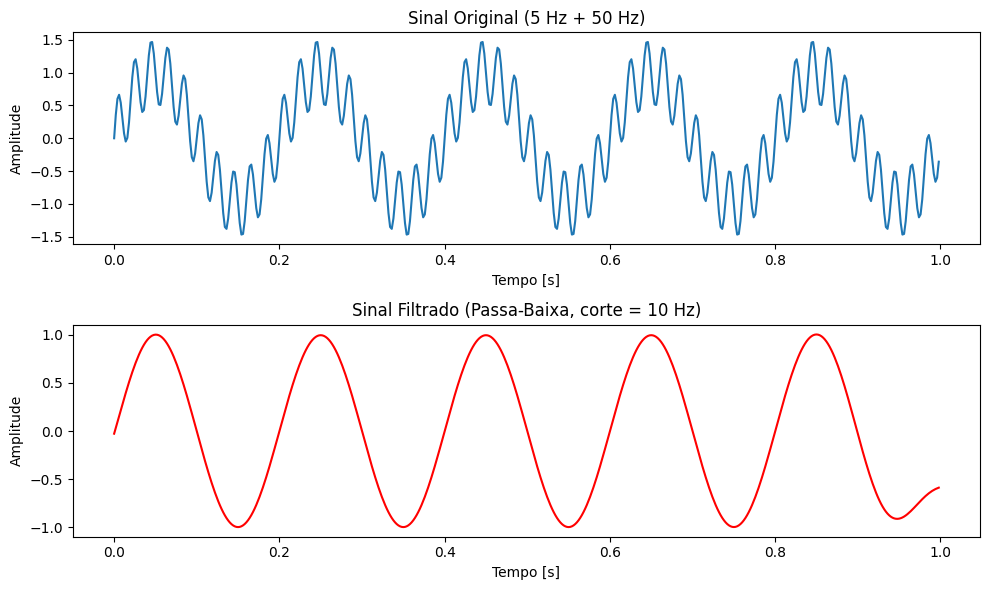

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Gera um sinal composto por duas frequências: 5 Hz e 50 Hz
fs = 500  # Frequência de amostragem (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vetor de tempo de 1 segundo
sinal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Define o filtro passa-baixa
def filtro_passa_baixa(corte, fs, ordem=4):
    nyquist = 0.5 * fs  # Frequência de Nyquist
    normalizado = corte / nyquist  # Normaliza a frequência de corte
    b, a = butter(ordem, normalizado, btype='low', analog=False)
    return b, a

# Aplica o filtro no sinal
corte = 10  # Frequência de corte em Hz
b, a = filtro_passa_baixa(corte, fs)
sinal_filtrado = filtfilt(b, a, sinal)

# Plota o sinal original e o sinal filtrado
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, sinal)
plt.title('Sinal Original (5 Hz + 50 Hz)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, sinal_filtrado, color='red')
plt.title('Sinal Filtrado (Passa-Baixa, corte = 10 Hz)')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()